In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

/home/alvaro/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))

In [4]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y = mx + b
b = 5

In [5]:
y_true = (0.5 * x_data) + 5 + noise

In [6]:
x_df = pd.DataFrame(data=x_data, columns=['X'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [7]:
my_data = pd.concat([x_df, y_df], axis=1)

In [8]:
my_data.head()

,X,Y
0,0.00000,4.570373
1,0.00001,5.603114
2,0.00002,3.636880
3,0.00003,5.898841
4,0.00004,5.870890


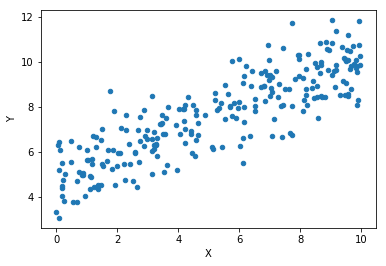

In [9]:
my_data.sample(n=250).plot(kind='scatter', x='X', y='Y');

We needed to use a sample, not the complete million data points, and that isn't rare. But we need to consider everything, so we are using it in batches.

In [10]:
batch_size = 8

In [11]:
m = tf.Variable(0.81)
b = tf.Variable(0.17) # randomly chosen

In [12]:
x = tf.placeholder(tf.float32, [batch_size])

In [13]:
y = tf.placeholder(tf.float32, [batch_size])

In [14]:
y_model = m * x + b #graph

In [15]:
error = tf.reduce_sum(tf.square(y-y_model))

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [17]:
train = optimizer.minimize(error)

In [18]:
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size) # 8 indexes that are the batch
        
        feed_dict = {
            x:x_data[rand_ind],
            y:y_true[rand_ind]
        }
        
        sess.run(train, feed_dict=feed_dict)
    model_m, model_b = sess.run([m, b])
        

In [20]:
model_m

0.4658142

In [21]:
model_b

4.9310627

In [22]:
y_hat = x_data * model_m + model_b

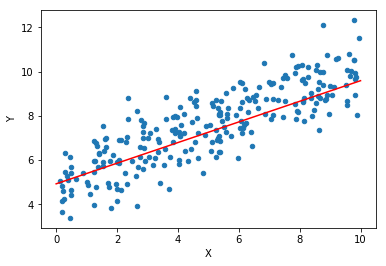

In [23]:
my_data.sample(n=250).plot(kind='scatter', x='X', y='Y')
plt.plot(x_data, y_hat, 'r')

# TensorFlow Estimator

There are a few types of Estimators to choose from:
- **tf.estimator.LinearClassifier**
- **tf.estimator.LinearRegressor**


- **tf.estimator.DNNClassifier**
- **tf.estimator.DNNRegressor**


- **tf.estimator.DNNLinearCombinedClassifier**
- **tf.estimator.DNNLinearCombinedRegressor**

In general, to use the Estimator API we do the following:

1. Define a list of feature columns
2. Create the Estimator Model
3. Create a Data Input Function
4. Call train, evaluate, and predict methods on the estimator object.


### Define a list of feature columns

In [24]:
feature_columns = [tf.feature_column.numeric_column('x', shape=[1])]

### Create the Estimator Model

In [25]:
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp86zujg8f', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fecede31d68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [29]:
print(x_test.shape) #must be 300,000, 30% of the size of the complete dataset

(300000,)


In [30]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [34]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [35]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [36]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp86zujg8f/model.ckpt.
INFO:tensorflow:loss = 524.96716, step = 1
INFO:tensorflow:global_step/sec: 488.81
INFO:tensorflow:loss = 24.969425, step = 101 (0.206 sec)
INFO:tensorflow:global_step/sec: 689.407
INFO:tensorflow:loss = 16.28669, step = 201 (0.145 sec)
INFO:tensorflow:global_step/sec: 596.91
INFO:tensorflow:loss = 10.74637, step = 301 (0.167 sec)
INFO:tensorflow:global_step/sec: 628.87
INFO:tensorflow:loss = 5.695011, step = 401 (0.160 sec)
INFO:tensorflow:global_step/sec: 660.909
INFO:tensorflow:loss = 9.440076, step = 501 (0.150 sec)
INFO:tensorflow:global_step/sec: 720.912
INFO:tensorflow:loss = 7.12395, step = 601 (0.141 sec)
INFO:tensorflow:global_step/sec: 631.46
INFO:tensorflow:loss = 13.

In [37]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-31-07:35:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp86zujg8f/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-31-07:35:29
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0831246, global_step = 1000, loss = 8.664997


In [41]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-31-07:36:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp86zujg8f/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-31-07:37:00
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1089388, global_step = 1000, loss = 8.8715105


In [39]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.0831246, 'loss': 8.664997, 'global_step': 1000}


In [42]:
print('Eval Metrics')
print(test_metrics)

Eval Metrics
{'average_loss': 1.1089388, 'loss': 8.8715105, 'global_step': 1000}


In [43]:
brand_new_data = np.linspace(0, 10, 10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [45]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp86zujg8f/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.392709], dtype=float32)},
 {'predictions': array([5.0489197], dtype=float32)},
 {'predictions': array([5.705131], dtype=float32)},
 {'predictions': array([6.361342], dtype=float32)},
 {'predictions': array([7.0175533], dtype=float32)},
 {'predictions': array([7.673764], dtype=float32)},
 {'predictions': array([8.329975], dtype=float32)},
 {'predictions': array([8.986186], dtype=float32)},
 {'predictions': array([9.642397], dtype=float32)},
 {'predictions': array([10.298609], dtype=float32)}]

In [46]:
predictions = []

for prediction in list(estimator.predict(input_fn=input_fn_predict)):
    predictions.append(prediction['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp86zujg8f/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


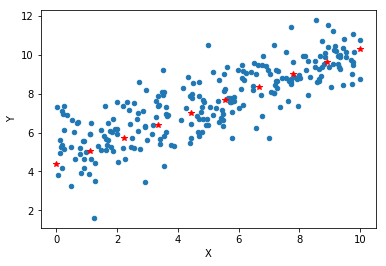

In [48]:
my_data.sample(n=250).plot(kind='scatter', x='X', y='Y')
plt.plot(brand_new_data, predictions, 'r*')